LR: 0.923485 (0.069470)
LDA: 0.869697 (0.107180)
KNN: 0.570455 (0.160993)
CART: 0.949242 (0.055778)
NB: 0.931818 (0.050593)
SVM: 0.631818 (0.112886)


C:\Users\Jingtian Zhang\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Jingtian Zhang\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Jingtian Zhang\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Jingtian Zhang\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Jingtian Zhang\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Jingtian Zhang\Miniconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warn

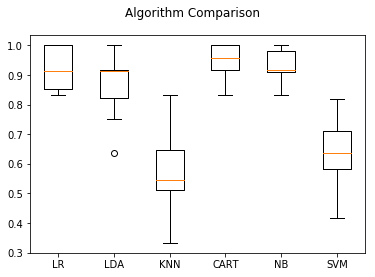

In [3]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn import metrics
from sklearn import ensemble
from sklearn import neural_network
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from database import Database

# load dataset
col= ["[H]", "[CX4H3]", "[CX4H2]", "[CX4H1]", "[CX4H0]","[CX3H2]", "[CX3H1]", "[CX3H0]", "[CX2H1]","[CX2H0]", "[CX4H2R]", "[CX4H1R]", "[CX4H0R]","[CX3H1R]","[CX3H0R]","[cX3H1](:*):*", "[cX3H0](:*)(:*)*", "[OX2H1]", "[OX2H1][cX3]:[c]", "[OX2H0]", "[OX2H0R]", "[oX2H0](:*):*", "[CX3H0]=[O]", "[CX3H0R]=[O]", "[CX3H1]=[O]", "[CX3H0](=[O])[OX2H1]", "[CX3H0](=[O])[OX2H0]", "[cX3H0](:*)(:*):*"]
df = Database()

X = df.loc[:, '[H]': '[cX3H0](:*)(:*):*']
y, labels=pd.factorize(df.Family)
train, test = train_test_split(df, test_size=0.1)

X_train = train.loc[:, '[H]': '[cX3H0](:*)(:*):*']
y_train, y_train_labels = pd.factorize(train.Family)

X_test = test.loc[:, '[H]': '[cX3H0](:*)(:*):*']
y_test, y_test_labels = pd.factorize(test.Family)

X = X_test
Y = y_test
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()